<a href="https://colab.research.google.com/github/mustafaozsahinn/daily-work/blob/main/november24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [4]:
#seaborn içinde builtin 22 dataset var
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
# load mpg dataset
# df dataframe pandas içinde gömülü format
df = sns.load_dataset("mpg")
# df.head() yapabiliriz, deafult 5 değişebilir
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [11]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
181,33.0,4,91.0,53.0,1795,17.5,75,japan,honda civic cvcc
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
93,14.0,8,318.0,150.0,4237,14.5,73,usa,plymouth fury gran sedan
119,20.0,4,114.0,91.0,2582,14.0,73,europe,audi 100ls
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
379,36.0,4,98.0,70.0,2125,17.3,82,usa,mercury lynx l
261,18.1,6,258.0,120.0,3410,15.1,78,usa,amc concord d/l
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
234,24.5,4,151.0,88.0,2740,16.0,77,usa,pontiac sunbird coupe


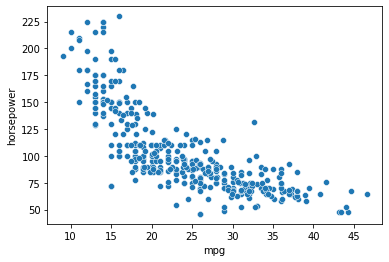

In [13]:
# draw a scatterplot between "mpg" and "horsepower"
sns.scatterplot(x = "mpg", y = "horsepower", data = df)

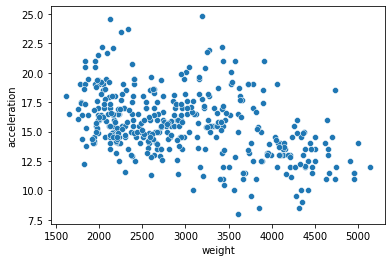

In [14]:
sns.scatterplot(x = "weight", y = "acceleration", data = df)

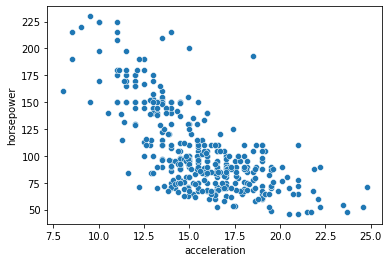

In [15]:
sns.scatterplot(x = "acceleration", y = "horsepower", data = df)

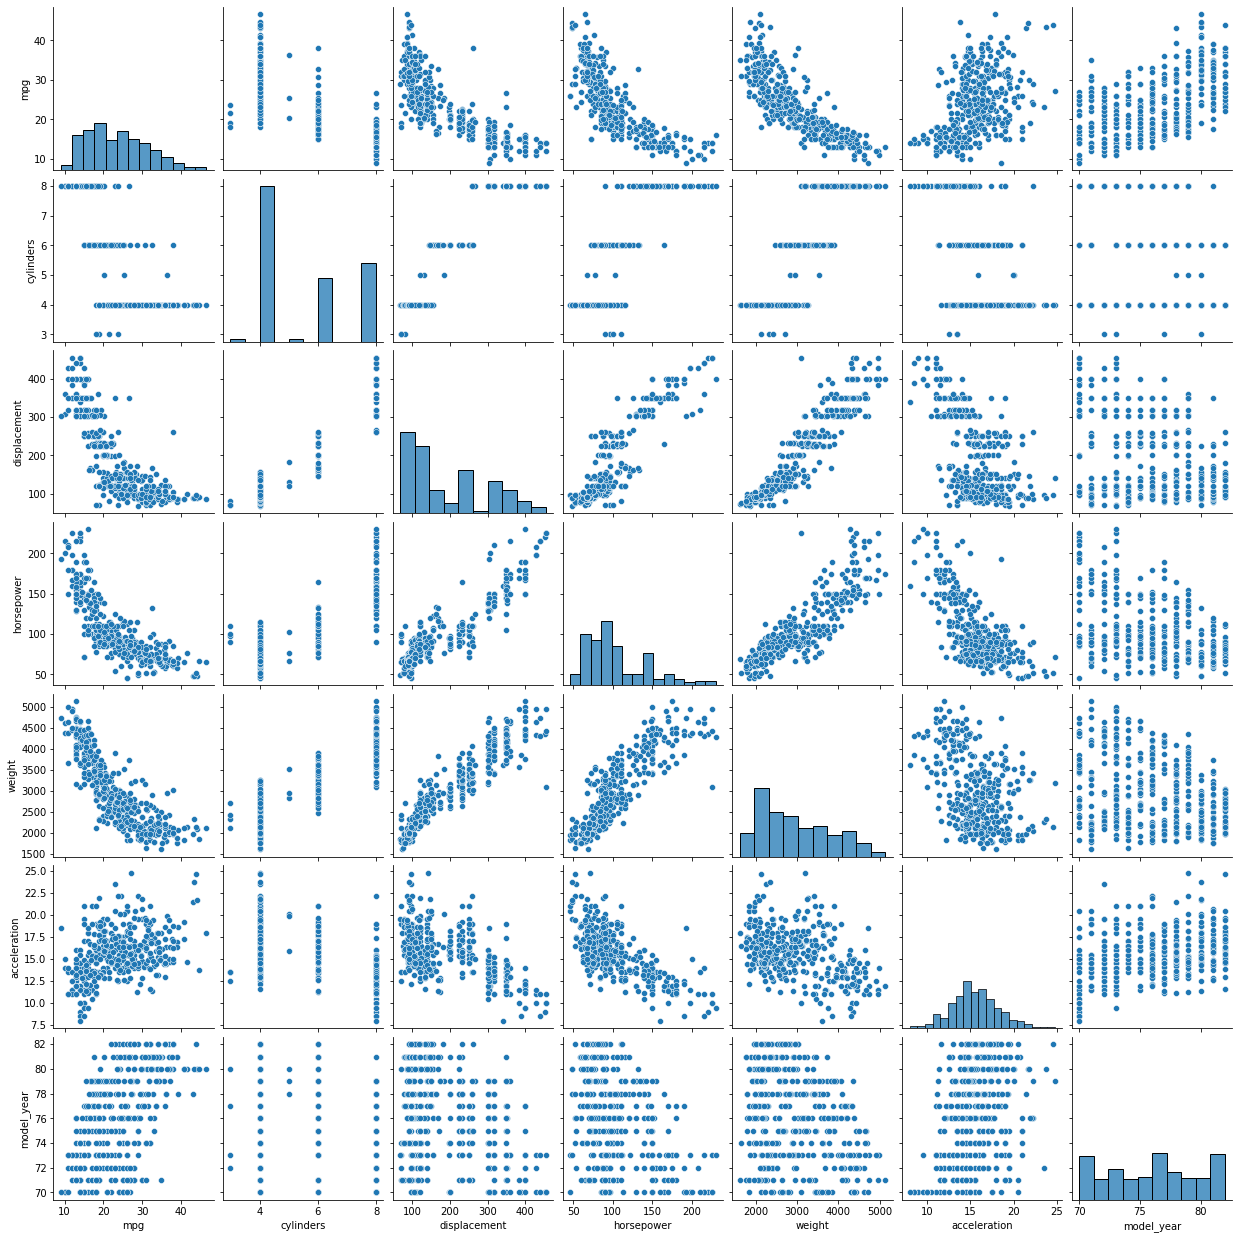

In [17]:
sns.pairplot(df)

# Correlation

In [18]:
#Define two variables as x and y
x = [93, 84, 82, 78, 98, 70]
y = [13, 10, 11, 8, 15, 9]

In [19]:
# check the coveriance between x and y
np.cov(x,y)

array([[102.56666667,  24.        ],
       [ 24.        ,   6.8       ]])

In [23]:
np.var(x, ddof=1)

102.56666666666668

In [22]:
np.var(y, ddof=1)

6.8

In [24]:
# 24 demek pozitive relationship
# but no clue about strenght

In [27]:
np.corrcoef(x,y)

array([[1.        , 0.90876934],
       [0.90876934, 1.        ]])

In [26]:
# korelasyon katsayısı 0.90876934 çok güçlü demektir.

In [28]:
np.corrcoef(x,y)[0][1]

0.9087693361896165

In [30]:
# pandas ın güzelliği :) corelastion için
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [33]:
# iki datanın arasındaki korelasyonu bulmak için
df["cylinders"].corr(df["displacement"]) 

0.9507213901392414

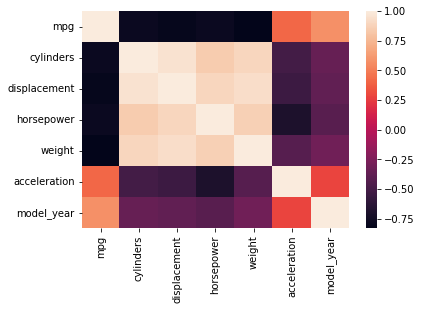

In [34]:
# draw a heatmap of correlation matrix
sns.heatmap(df.corr())

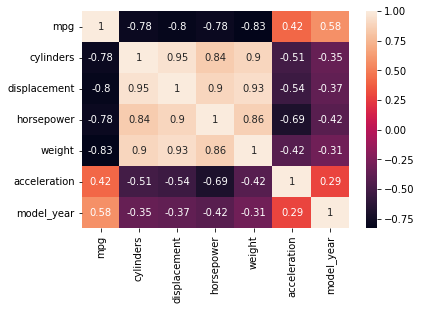

In [35]:
# draw a heatmap of correlation matrix
# annot ile annotation ekleriz
sns.heatmap(df.corr(), annot = True)

In [38]:
# ilk 2 satır mean based
# diğerleri 5 numbers summary (median based)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [41]:
# scipy stats library de nasıl yapılıyor
stats.pearsonr(df["cylinders"], df["displacement"])[0] # parametric corralation

0.9507213901392413

In [42]:
stats.spearmanr(df["cylinders"], df["displacement"])[0] # non parametric corralation

0.9118759147045389

In [43]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [45]:
df.corr(method = "spearman") # methodu değiştirebiliriz, default pearson

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677,0.573469
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189,-0.335012
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512,-0.305257
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550,-0.277015
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000,0.274632
model_year,0.573469,-0.335012,-0.305257,-0.389498,-0.277015,0.274632,1.000000
